# Precip Compare: Dry Days, 1981-2011

Compare the dry day spell length distributions and samples among the three data sets for the period 1981-2011.

Use two datasets for this climate period

1. PRISM (actual data)
2. LOCA (downscaled GCM results)

The purpose of this notebook is purely to compare the datasets.

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats

Parameters, primarily input file names

In [3]:
PRISM_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rech' \
           r'arge\Data\JNotes\Processed\PRISM\DryDays_1981-2010.pickle'
CMIP5_IN = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Rech' \
           r'arge\Data\JNotes\Processed\CMIP5\DryDays_1981-2010.pickle'

In [4]:
OUT_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\Data\JN' \
          r'otes\Processed\Precip_Compare_1981-2010'

In [5]:
LOCA_GRID_END = 168       # the last LOCA grid cell

## Load Files

### Load and Reduce DataFrames

In [6]:
PrismDF = pd.read_pickle( PRISM_IN )

In [7]:
display( HTML( PrismDF.head().to_html() ) )

,Grid_Id,Year,Month,Day,Dry_Count
0,662328,1981,1,1,5
1,662328,1981,1,7,2
2,662328,1981,1,10,1
3,662328,1981,1,12,2
4,662328,1981,1,15,2


In [8]:
JanPRDF = PrismDF[PrismDF["Month"] == 1].copy()
FebPRDF = PrismDF[PrismDF["Month"] == 2].copy()
MarPRDF = PrismDF[PrismDF["Month"] == 3].copy()
AprPRDF = PrismDF[PrismDF["Month"] == 4].copy()
MayPRDF = PrismDF[PrismDF["Month"] == 5].copy()
JunPRDF = PrismDF[PrismDF["Month"] == 6].copy()
JulPRDF = PrismDF[PrismDF["Month"] == 7].copy()
AugPRDF = PrismDF[PrismDF["Month"] == 8].copy()
SepPRDF = PrismDF[PrismDF["Month"] == 9].copy()
OctPRDF = PrismDF[PrismDF["Month"] == 10].copy()
NovPRDF = PrismDF[PrismDF["Month"] == 11].copy()
DecPRDF = PrismDF[PrismDF["Month"] == 12].copy()

In [9]:
del PrismDF

In [10]:
CmipDF = pd.read_pickle( CMIP5_IN )

In [11]:
display( HTML( CmipDF.head().to_html() ) )

,MGrid_Id,Year,Month,Day,Dry_Count
0,M100_169,1981,1,1,1
1,M100_169,1981,1,4,3
2,M100_169,1981,1,13,1
3,M100_169,1981,1,18,6
4,M100_169,1981,1,26,1


Need to split CMIP5 data by grid id and then by month.

In [12]:
ExGridID = lambda MID: int( MID.split("_")[1] )

In [13]:
CmipDF["Grid_Id"] = CmipDF.apply( lambda row: ExGridID(row["MGrid_Id"]), axis=1 )

In [14]:
display( HTML( CmipDF.head().to_html() ) )

,MGrid_Id,Year,Month,Day,Dry_Count,Grid_Id
0,M100_169,1981,1,1,1,169
1,M100_169,1981,1,4,3,169
2,M100_169,1981,1,13,1,169
3,M100_169,1981,1,18,6,169
4,M100_169,1981,1,26,1,169


In [15]:
display( HTML( CmipDF.tail().to_html() ) )

,MGrid_Id,Year,Month,Day,Dry_Count,Grid_Id
23170452,M9_99,2010,11,6,7,99
23170453,M9_99,2010,11,17,12,99
23170454,M9_99,2010,12,1,8,99
23170455,M9_99,2010,12,11,18,99
23170456,M9_99,2010,12,31,1,99


In [16]:
Test1 = CmipDF[CmipDF["Grid_Id"] == 92].copy()

In [17]:
UniqMods = sorted( Test1["MGrid_Id"].unique() )
len(UniqMods)

64

In [18]:
UniqMods

['M10_92',
 'M11_92',
 'M12_92',
 'M13_92',
 'M14_92',
 'M15_92',
 'M16_92',
 'M17_92',
 'M18_92',
 'M19_92',
 'M1_92',
 'M20_92',
 'M21_92',
 'M22_92',
 'M23_92',
 'M24_92',
 'M25_92',
 'M26_92',
 'M27_92',
 'M28_92',
 'M29_92',
 'M2_92',
 'M30_92',
 'M31_92',
 'M32_92',
 'M33_92',
 'M34_92',
 'M35_92',
 'M36_92',
 'M37_92',
 'M38_92',
 'M39_92',
 'M3_92',
 'M40_92',
 'M41_92',
 'M42_92',
 'M43_92',
 'M44_92',
 'M45_92',
 'M46_92',
 'M47_92',
 'M48_92',
 'M49_92',
 'M4_92',
 'M50_92',
 'M51_92',
 'M52_92',
 'M53_92',
 'M54_92',
 'M55_92',
 'M56_92',
 'M57_92',
 'M58_92',
 'M59_92',
 'M5_92',
 'M60_92',
 'M61_92',
 'M62_92',
 'M63_92',
 'M64_92',
 'M6_92',
 'M7_92',
 'M8_92',
 'M9_92']

In [19]:
JanLODF = CmipDF[(CmipDF["Month"] == 1) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
FebLODF = CmipDF[(CmipDF["Month"] == 2) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
MarLODF = CmipDF[(CmipDF["Month"] == 3) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
AprLODF = CmipDF[(CmipDF["Month"] == 4) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
MayLODF = CmipDF[(CmipDF["Month"] == 5) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
JunLODF = CmipDF[(CmipDF["Month"] == 6) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
JulLODF = CmipDF[(CmipDF["Month"] == 7) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
AugLODF = CmipDF[(CmipDF["Month"] == 8) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
SepLODF = CmipDF[(CmipDF["Month"] == 9) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
OctLODF = CmipDF[(CmipDF["Month"] == 10) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
NovLODF = CmipDF[(CmipDF["Month"] == 11) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()
DecLODF = CmipDF[(CmipDF["Month"] == 12) & (CmipDF["Grid_Id"] <= LOCA_GRID_END)].copy()

In [20]:
del CmipDF

## Comparisons by Month

In [21]:
SPRMean = list()
SPRMeanMinCI = list()
SPRMeanMaxCI = list()
SPRVar = list()
SPRVarMinCI = list()
SPRVarMaxCI = list()
SPRStd = list()
SPRStdMinCI = list()
SPRStdMaxCI = list()

In [22]:
SLOMean = list()
SLOMeanMinCI = list()
SLOMeanMaxCI = list()
SLOVar = list()
SLOVarMinCI = list()
SLOVarMaxCI = list()
SLOStd = list()
SLOStdMinCI = list()
SLOStdMaxCI = list()

In [23]:
SBCMean = list()
SBCMeanMinCI = list()
SBCMeanMaxCI = list()
SBCVar = list()
SBCVarMinCI = list()
SBCVarMaxCI = list()
SBCStd = list()
SBCStdMinCI = list()
SBCStdMaxCI = list()

In [24]:
CompQs = [ round(x * 0.05, 2) for x in range(21) ]
nCompQs = np.array( CompQs, dtype=np.float32 )
nCompQs

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
      dtype=float32)

### Jan

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [25]:
JanPrBSCI = sstats.bayes_mvs( np.array( JanPRDF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [26]:
JanPrBSCI

(Mean(statistic=8.66702285544672, minmax=(8.558955269849472, 8.77509044104397)),
 Variance(statistic=72.71221912711195, minmax=(71.409009900191, 74.0154283540329)),
 Std_dev(statistic=8.527146013005286, minmax=(8.450730690403013, 8.603561335607559)))

In [27]:
JanPrBSCI[0][0], JanPrBSCI[0][1][0], JanPrBSCI[0][1][1]

(8.66702285544672, 8.558955269849472, 8.77509044104397)

In [28]:
SPRMean.append( JanPrBSCI[0][0] )
SPRMeanMinCI.append( JanPrBSCI[0][1][0] )
SPRMeanMaxCI.append( JanPrBSCI[0][1][1] )
SPRVar.append( JanPrBSCI[1][0] )
SPRVarMinCI.append( JanPrBSCI[1][1][0] )
SPRVarMaxCI.append( JanPrBSCI[1][1][1] )
SPRStd.append( JanPrBSCI[2][0] )
SPRStdMinCI.append( JanPrBSCI[2][1][0] )
SPRStdMaxCI.append( JanPrBSCI[2][1][1] )

In [29]:
JanLOBSCI = sstats.bayes_mvs( np.array( JanLODF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [30]:
SLOMean.append( JanLOBSCI[0][0] )
SLOMeanMinCI.append( JanLOBSCI[0][1][0] )
SLOMeanMaxCI.append( JanLOBSCI[0][1][1] )
SLOVar.append( JanLOBSCI[1][0] )
SLOVarMinCI.append( JanLOBSCI[1][1][0] )
SLOVarMaxCI.append( JanLOBSCI[1][1][1] )
SLOStd.append( JanLOBSCI[2][0] )
SLOStdMinCI.append( JanLOBSCI[2][1][0] )
SLOStdMaxCI.append( JanLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [31]:
JanTTPRtoLO = sstats.ttest_ind( np.array( JanPRDF["Dry_Count"], dtype=np.int32 ), 
                                np.array( JanLODF["Dry_Count"], dtype=np.int32 ) )

In [32]:
JanTTPRtoLOPval = JanTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % JanTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 2.17903e-74


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [33]:
JanMWUPRtoLO = sstats.mannwhitneyu( np.array( JanPRDF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( JanLODF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [34]:
JanMWUPRtoLOPval = JanMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % JanMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 2.17395e-38


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [35]:
JanKWPRtoLO = sstats.kruskal( np.array( JanPRDF["Dry_Count"], dtype=np.int32 ), 
                              np.array( JanLODF["Dry_Count"], dtype=np.int32 ) )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:5879: RuntimeWarning: overflow encountered in long_scalars
  h = 12.0 / (totaln * (totaln + 1)) * ssbn - 3 * (totaln + 1)


In [36]:
JanKWPRtoLOPval = JanKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % JanKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [37]:
JanLODF["Dry_Count"].median(), JanPRDF["Dry_Count"].median()

(5.0, 6.0)

#### Plots

In [38]:
JanPRQs = JanPRDF["Dry_Count"].quantile(q=nCompQs)
JanLOQs = JanLODF["Dry_Count"].quantile(q=nCompQs)

In [39]:
maxQs = max( JanPRQs.max(), JanLOQs.max() )
maxQs = maxQs + 10.0
maxQs

100.0

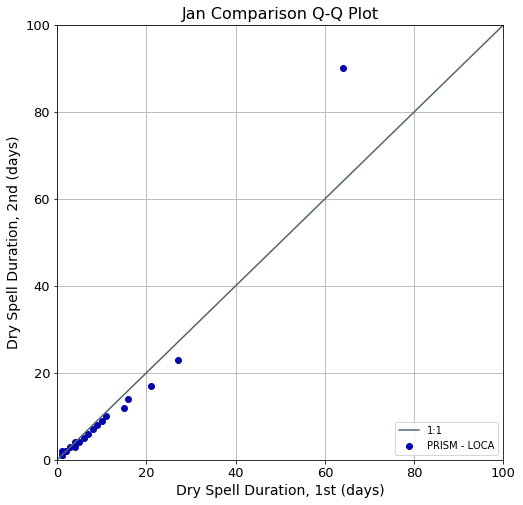

In [40]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JanPRQs, JanLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

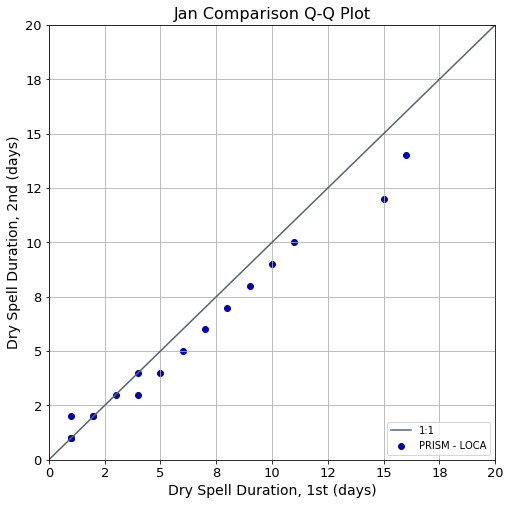

In [41]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JanPRQs, JanLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jan Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

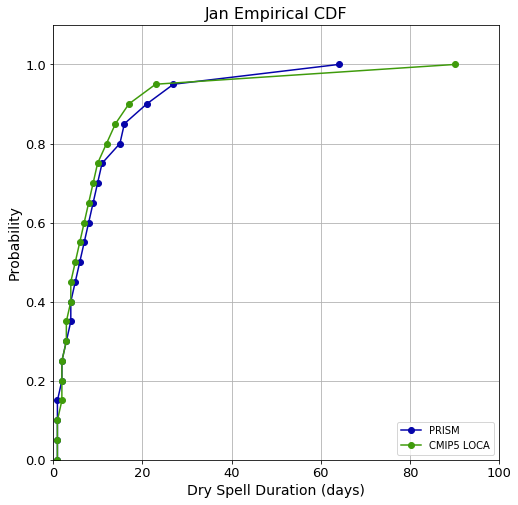

In [42]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( JanPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( JanLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="CMIP5 LOCA")
ax11.set_title('Jan Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [43]:
testS = np.array( [ x for x in range(1, int(maxQs) + 1, 1)], dtype=np.int32 )

### Feb

In [44]:
FebNum = 2

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [45]:
FebPrBSCI = sstats.bayes_mvs( np.array( FebPRDF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [46]:
FebPrBSCI

(Mean(statistic=8.246318049013178, minmax=(8.139254272564159, 8.353381825462197)),
 Variance(statistic=71.05416851347724, minmax=(69.77786978434993, 72.33046724260454)),
 Std_dev(statistic=8.4293634702436, minmax=(8.353657947897059, 8.505068992590143)))

In [47]:
FebPrBSCI[0][0], FebPrBSCI[0][1][0], FebPrBSCI[0][1][1]

(8.246318049013178, 8.139254272564159, 8.353381825462197)

In [48]:
SPRMean.append( FebPrBSCI[0][0] )
SPRMeanMinCI.append( FebPrBSCI[0][1][0] )
SPRMeanMaxCI.append( FebPrBSCI[0][1][1] )
SPRVar.append( FebPrBSCI[1][0] )
SPRVarMinCI.append( FebPrBSCI[1][1][0] )
SPRVarMaxCI.append( FebPrBSCI[1][1][1] )
SPRStd.append( FebPrBSCI[2][0] )
SPRStdMinCI.append( FebPrBSCI[2][1][0] )
SPRStdMaxCI.append( FebPrBSCI[2][1][1] )

In [49]:
FebLOBSCI = sstats.bayes_mvs( np.array( FebLODF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [50]:
SLOMean.append( FebLOBSCI[0][0] )
SLOMeanMinCI.append( FebLOBSCI[0][1][0] )
SLOMeanMaxCI.append( FebLOBSCI[0][1][1] )
SLOVar.append( FebLOBSCI[1][0] )
SLOVarMinCI.append( FebLOBSCI[1][1][0] )
SLOVarMaxCI.append( FebLOBSCI[1][1][1] )
SLOStd.append( FebLOBSCI[2][0] )
SLOStdMinCI.append( FebLOBSCI[2][1][0] )
SLOStdMaxCI.append( FebLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [51]:
FebTTPRtoLO = sstats.ttest_ind( np.array( FebPRDF["Dry_Count"], dtype=np.int32 ), 
                                np.array( FebLODF["Dry_Count"], dtype=np.int32 ) )

In [52]:
FebTTPRtoLOPval = FebTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % FebTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 8.54868e-109


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [53]:
FebMWUPRtoLO = sstats.mannwhitneyu( np.array( FebPRDF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( FebLODF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [54]:
FebMWUPRtoLOPval = FebMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % FebMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 1.66113e-61


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [55]:
FebKWPRtoLO = sstats.kruskal( np.array( FebPRDF["Dry_Count"], dtype=np.int32 ), 
                              np.array( FebLODF["Dry_Count"], dtype=np.int32 ) )

In [56]:
FebKWPRtoLOPval = FebKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % FebKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 1


In [57]:
FebLODF["Dry_Count"].median(), FebPRDF["Dry_Count"].median()

(5.0, 5.0)

#### Plots

In [58]:
FebPRQs = FebPRDF["Dry_Count"].quantile(q=nCompQs)
FebLOQs = FebLODF["Dry_Count"].quantile(q=nCompQs)

In [59]:
maxQs = max( FebPRQs.max(), FebLOQs.max() )
maxQs = maxQs + 10.0
maxQs

103.0

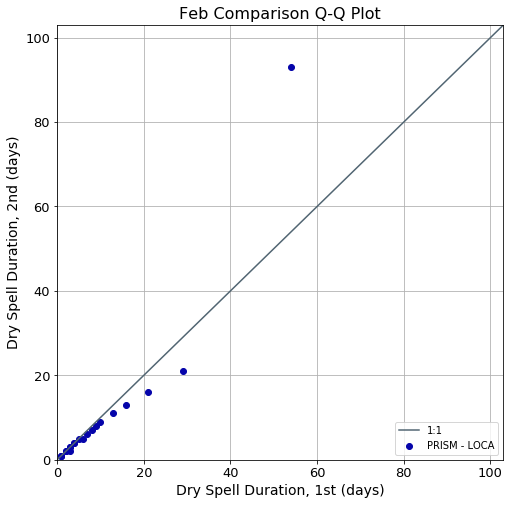

In [60]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( FebPRQs, FebLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

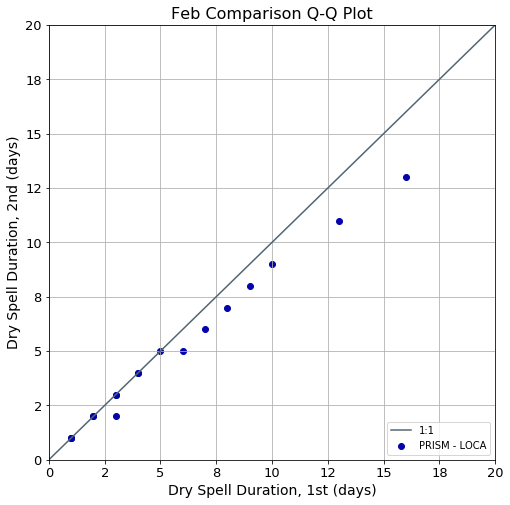

In [61]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( FebPRQs, FebLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Feb Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

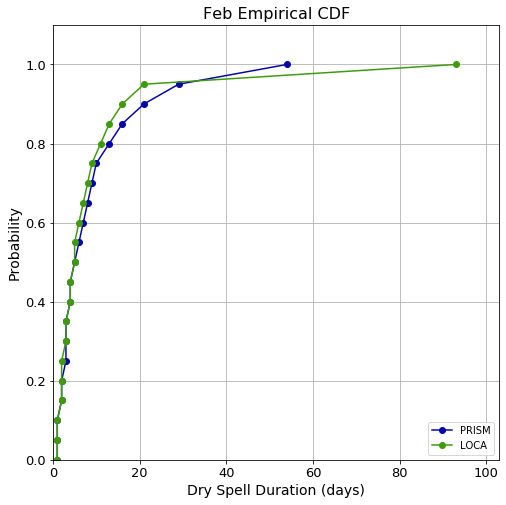

In [62]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( FebPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( FebLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Feb Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Mar

In [63]:
MarNum = 3

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [64]:
MarPrBSCI = sstats.bayes_mvs( np.array( MarPRDF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [65]:
MarPrBSCI

(Mean(statistic=8.187301294751878, minmax=(8.099324081623717, 8.275278507880039)),
 Variance(statistic=62.08771230875149, minmax=(61.10734679095449, 63.068077826548496)),
 Std_dev(statistic=7.879575642682256, minmax=(7.817366358689439, 7.941784926675073)))

In [66]:
MarPrBSCI[0][0], MarPrBSCI[0][1][0], MarPrBSCI[0][1][1]

(8.187301294751878, 8.099324081623717, 8.275278507880039)

In [67]:
SPRMean.append( MarPrBSCI[0][0] )
SPRMeanMinCI.append( MarPrBSCI[0][1][0] )
SPRMeanMaxCI.append( MarPrBSCI[0][1][1] )
SPRVar.append( MarPrBSCI[1][0] )
SPRVarMinCI.append( MarPrBSCI[1][1][0] )
SPRVarMaxCI.append( MarPrBSCI[1][1][1] )
SPRStd.append( MarPrBSCI[2][0] )
SPRStdMinCI.append( MarPrBSCI[2][1][0] )
SPRStdMaxCI.append( MarPrBSCI[2][1][1] )

In [68]:
MarLOBSCI = sstats.bayes_mvs( np.array( MarLODF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [69]:
SLOMean.append( MarLOBSCI[0][0] )
SLOMeanMinCI.append( MarLOBSCI[0][1][0] )
SLOMeanMaxCI.append( MarLOBSCI[0][1][1] )
SLOVar.append( MarLOBSCI[1][0] )
SLOVarMinCI.append( MarLOBSCI[1][1][0] )
SLOVarMaxCI.append( MarLOBSCI[1][1][1] )
SLOStd.append( MarLOBSCI[2][0] )
SLOStdMinCI.append( MarLOBSCI[2][1][0] )
SLOStdMaxCI.append( MarLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [70]:
MarTTPRtoLO = sstats.ttest_ind( np.array( MarPRDF["Dry_Count"], dtype=np.int32 ), 
                                np.array( MarLODF["Dry_Count"], dtype=np.int32 ) )

In [71]:
MarTTPRtoLOPval = MarTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % MarTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 1.10822e-149


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [72]:
MarMWUPRtoLO = sstats.mannwhitneyu( np.array( MarPRDF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( MarLODF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [73]:
MarMWUPRtoLOPval = MarMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % MarMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 2.56072e-180


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [74]:
MarKWPRtoLO = sstats.kruskal( np.array( MarPRDF["Dry_Count"], dtype=np.int32 ), 
                              np.array( MarLODF["Dry_Count"], dtype=np.int32 ) )

In [75]:
MarKWPRtoLOPval = MarKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % MarKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 1


In [76]:
MarLODF["Dry_Count"].median(), MarPRDF["Dry_Count"].median()

(5.0, 6.0)

#### Plots

In [77]:
MarPRQs = MarPRDF["Dry_Count"].quantile(q=nCompQs)
MarLOQs = MarLODF["Dry_Count"].quantile(q=nCompQs)

In [78]:
maxQs = max( MarPRQs.max(), MarLOQs.max() )
maxQs = maxQs + 10.0
maxQs

88.0

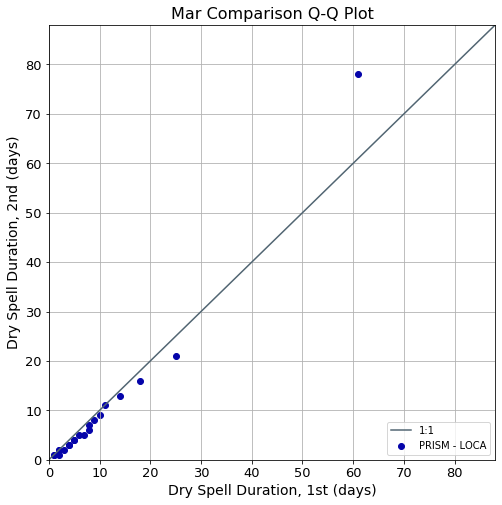

In [79]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MarPRQs, MarLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

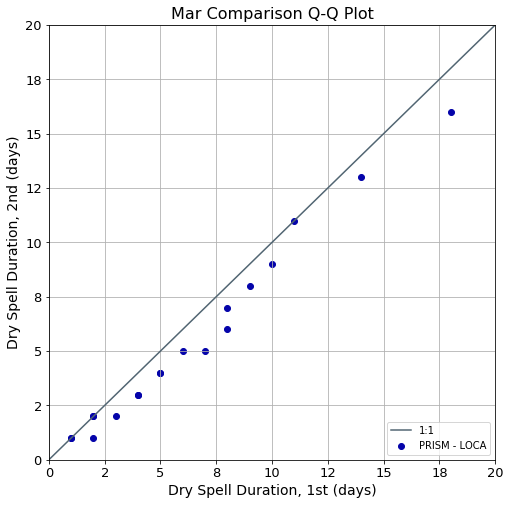

In [80]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MarPRQs, MarLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Mar Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

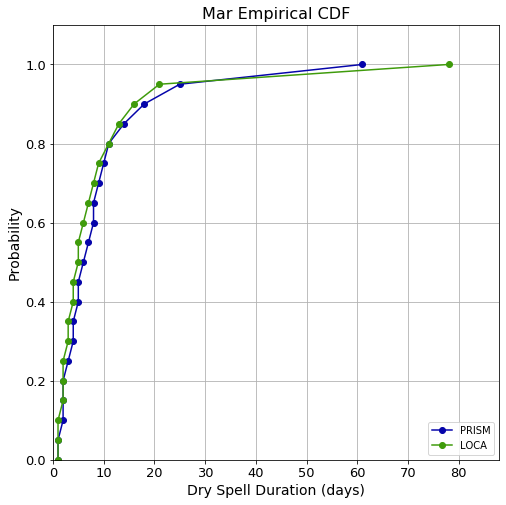

In [81]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( MarPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( MarLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Mar Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Apr

In [82]:
AprNum = 4

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [83]:
AprPrBSCI = sstats.bayes_mvs( np.array( AprPRDF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [84]:
AprPrBSCI

(Mean(statistic=7.712354096845025, minmax=(7.623258177327223, 7.801450016362827)),
 Variance(statistic=50.775921570212326, minmax=(49.878075844639426, 51.673767295785225)),
 Std_dev(statistic=7.12572252969566, minmax=(7.0627222008285715, 7.188722858562749)))

In [85]:
AprPrBSCI[0][0], AprPrBSCI[0][1][0], AprPrBSCI[0][1][1]

(7.712354096845025, 7.623258177327223, 7.801450016362827)

In [86]:
SPRMean.append( AprPrBSCI[0][0] )
SPRMeanMinCI.append( AprPrBSCI[0][1][0] )
SPRMeanMaxCI.append( AprPrBSCI[0][1][1] )
SPRVar.append( AprPrBSCI[1][0] )
SPRVarMinCI.append( AprPrBSCI[1][1][0] )
SPRVarMaxCI.append( AprPrBSCI[1][1][1] )
SPRStd.append( AprPrBSCI[2][0] )
SPRStdMinCI.append( AprPrBSCI[2][1][0] )
SPRStdMaxCI.append( AprPrBSCI[2][1][1] )

In [87]:
AprLOBSCI = sstats.bayes_mvs( np.array( AprLODF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [88]:
SLOMean.append( AprLOBSCI[0][0] )
SLOMeanMinCI.append( AprLOBSCI[0][1][0] )
SLOMeanMaxCI.append( AprLOBSCI[0][1][1] )
SLOVar.append( AprLOBSCI[1][0] )
SLOVarMinCI.append( AprLOBSCI[1][1][0] )
SLOVarMaxCI.append( AprLOBSCI[1][1][1] )
SLOStd.append( AprLOBSCI[2][0] )
SLOStdMinCI.append( AprLOBSCI[2][1][0] )
SLOStdMaxCI.append( AprLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [89]:
AprTTPRtoLO = sstats.ttest_ind( np.array( AprPRDF["Dry_Count"], dtype=np.int32 ), 
                                np.array( AprLODF["Dry_Count"], dtype=np.int32 ) )

In [90]:
AprTTPRtoLOPval = AprTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % AprTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [91]:
AprMWUPRtoLO = sstats.mannwhitneyu( np.array( AprPRDF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( AprLODF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [92]:
AprMWUPRtoLOPval = AprMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % AprMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 0


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [93]:
AprKWPRtoLO = sstats.kruskal( np.array( AprPRDF["Dry_Count"], dtype=np.int32 ), 
                              np.array( AprLODF["Dry_Count"], dtype=np.int32 ) )

In [94]:
AprKWPRtoLOPval = AprKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % AprKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 1


In [95]:
AprLODF["Dry_Count"].median(), AprPRDF["Dry_Count"].median()

(4.0, 6.0)

#### Plots

In [96]:
AprPRQs = AprPRDF["Dry_Count"].quantile(q=nCompQs)
AprLOQs = AprLODF["Dry_Count"].quantile(q=nCompQs)

In [97]:
maxQs = max( AprPRQs.max(), AprLOQs.max() )
maxQs = maxQs + 10.0
maxQs

75.0

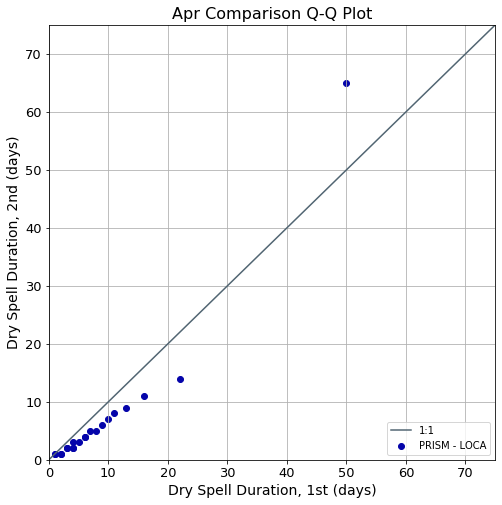

In [98]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AprPRQs, AprLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

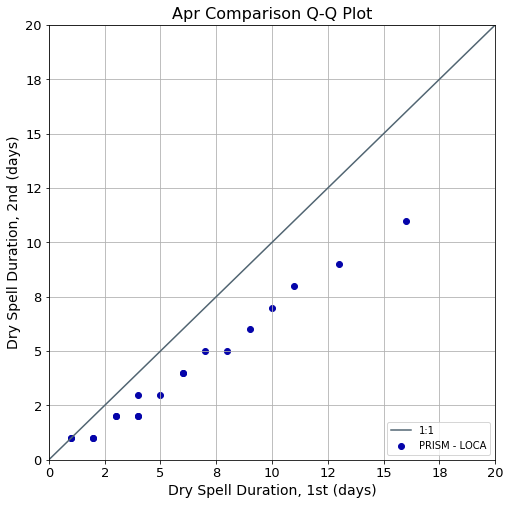

In [99]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AprPRQs, AprLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Apr Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

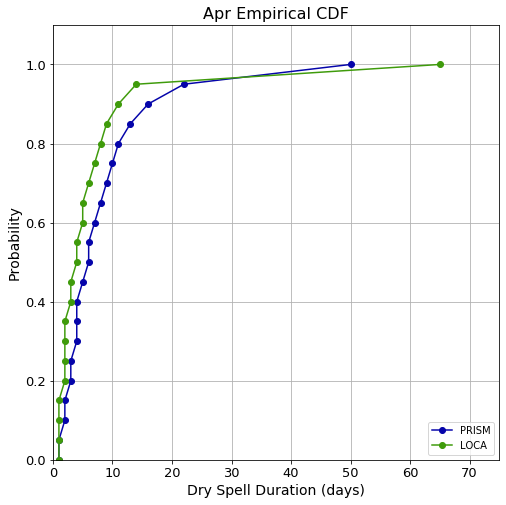

In [100]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AprPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( AprLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Apr Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### May

In [101]:
MayNum = 5

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [102]:
MayPrBSCI = sstats.bayes_mvs( np.array( MayPRDF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [103]:
MayPrBSCI

(Mean(statistic=6.13762231113576, minmax=(6.074561016952325, 6.200683605319195)),
 Variance(statistic=37.10327219788117, minmax=(36.560041900841654, 37.64650249492068)),
 Std_dev(statistic=6.091245537480916, minmax=(6.046654468733409, 6.135836606228422)))

In [104]:
MayPrBSCI[0][0], MayPrBSCI[0][1][0], MayPrBSCI[0][1][1]

(6.13762231113576, 6.074561016952325, 6.200683605319195)

In [105]:
SPRMean.append( MayPrBSCI[0][0] )
SPRMeanMinCI.append( MayPrBSCI[0][1][0] )
SPRMeanMaxCI.append( MayPrBSCI[0][1][1] )
SPRVar.append( MayPrBSCI[1][0] )
SPRVarMinCI.append( MayPrBSCI[1][1][0] )
SPRVarMaxCI.append( MayPrBSCI[1][1][1] )
SPRStd.append( MayPrBSCI[2][0] )
SPRStdMinCI.append( MayPrBSCI[2][1][0] )
SPRStdMaxCI.append( MayPrBSCI[2][1][1] )

In [106]:
MayLOBSCI = sstats.bayes_mvs( np.array( MayLODF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [107]:
SLOMean.append( MayLOBSCI[0][0] )
SLOMeanMinCI.append( MayLOBSCI[0][1][0] )
SLOMeanMaxCI.append( MayLOBSCI[0][1][1] )
SLOVar.append( MayLOBSCI[1][0] )
SLOVarMinCI.append( MayLOBSCI[1][1][0] )
SLOVarMaxCI.append( MayLOBSCI[1][1][1] )
SLOStd.append( MayLOBSCI[2][0] )
SLOStdMinCI.append( MayLOBSCI[2][1][0] )
SLOStdMaxCI.append( MayLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [108]:
MayTTPRtoLO = sstats.ttest_ind( np.array( MayPRDF["Dry_Count"], dtype=np.int32 ), 
                                np.array( MayLODF["Dry_Count"], dtype=np.int32 ) )

In [109]:
MayTTPRtoLOPval = MayTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % MayTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [110]:
MayMWUPRtoLO = sstats.mannwhitneyu( np.array( MayPRDF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( MayLODF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [111]:
MayMWUPRtoLOPval = MayMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % MayMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 0


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [112]:
MayKWPRtoLO = sstats.kruskal( np.array( MayPRDF["Dry_Count"], dtype=np.int32 ), 
                              np.array( MayLODF["Dry_Count"], dtype=np.int32 ) )

In [113]:
MayKWPRtoLOPval = MayKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % MayKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [114]:
MayLODF["Dry_Count"].median(), MayPRDF["Dry_Count"].median()

(3.0, 4.0)

#### Plots

In [115]:
MayPRQs = MayPRDF["Dry_Count"].quantile(q=nCompQs)
MayLOQs = MayLODF["Dry_Count"].quantile(q=nCompQs)

In [116]:
maxQs = max( MayPRQs.max(), MayLOQs.max() )
maxQs = maxQs + 10.0
maxQs

96.0

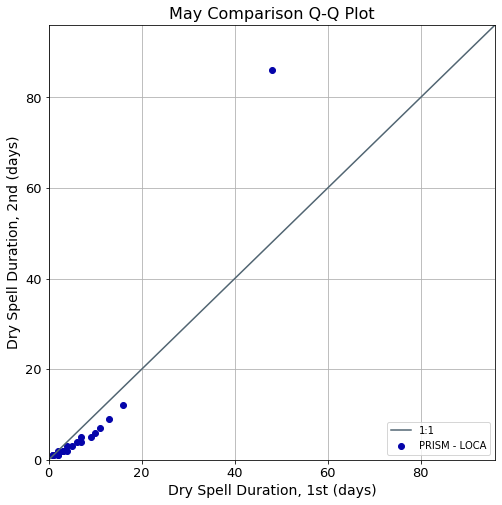

In [117]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MayPRQs, MayLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

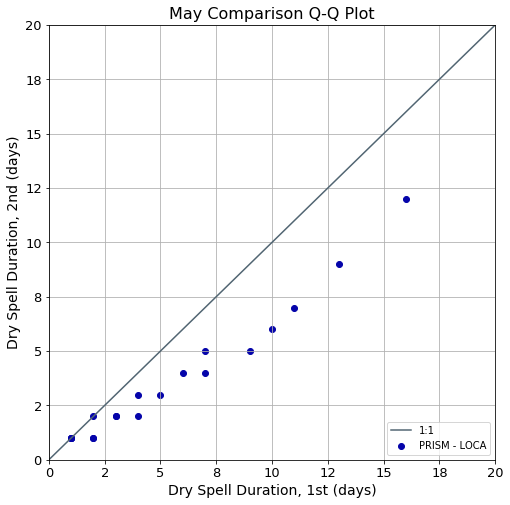

In [118]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( MayPRQs, MayLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('May Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

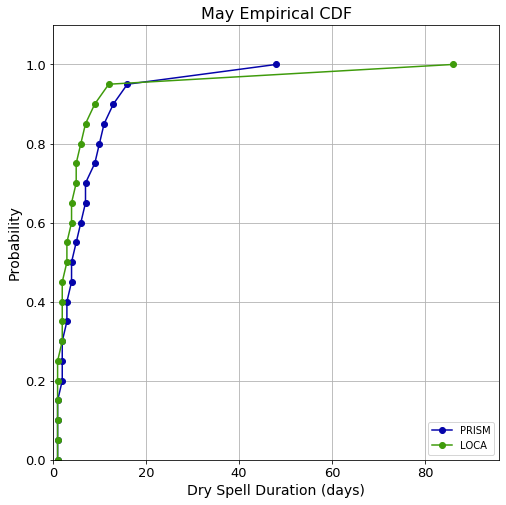

In [119]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( MayPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( MayLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('May Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jun

In [120]:
JunNum = 6

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [121]:
JunPrBSCI = sstats.bayes_mvs( np.array( JunPRDF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [122]:
JunPrBSCI

(Mean(statistic=6.9794300312734, minmax=(6.884109061693431, 7.074751000853368)),
 Variance(statistic=76.24399391378253, minmax=(75.06691313460583, 77.42107469295924)),
 Std_dev(statistic=8.731780684017581, minmax=(8.664378580038308, 8.799182787996854)))

In [123]:
JunPrBSCI[0][0], JunPrBSCI[0][1][0], JunPrBSCI[0][1][1]

(6.9794300312734, 6.884109061693431, 7.074751000853368)

In [124]:
SPRMean.append( JunPrBSCI[0][0] )
SPRMeanMinCI.append( JunPrBSCI[0][1][0] )
SPRMeanMaxCI.append( JunPrBSCI[0][1][1] )
SPRVar.append( JunPrBSCI[1][0] )
SPRVarMinCI.append( JunPrBSCI[1][1][0] )
SPRVarMaxCI.append( JunPrBSCI[1][1][1] )
SPRStd.append( JunPrBSCI[2][0] )
SPRStdMinCI.append( JunPrBSCI[2][1][0] )
SPRStdMaxCI.append( JunPrBSCI[2][1][1] )

In [125]:
JunLOBSCI = sstats.bayes_mvs( np.array( JunLODF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [126]:
SLOMean.append( JunLOBSCI[0][0] )
SLOMeanMinCI.append( JunLOBSCI[0][1][0] )
SLOMeanMaxCI.append( JunLOBSCI[0][1][1] )
SLOVar.append( JunLOBSCI[1][0] )
SLOVarMinCI.append( JunLOBSCI[1][1][0] )
SLOVarMaxCI.append( JunLOBSCI[1][1][1] )
SLOStd.append( JunLOBSCI[2][0] )
SLOStdMinCI.append( JunLOBSCI[2][1][0] )
SLOStdMaxCI.append( JunLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [127]:
JunTTPRtoLO = sstats.ttest_ind( np.array( JunPRDF["Dry_Count"], dtype=np.int32 ), 
                                np.array( JunLODF["Dry_Count"], dtype=np.int32 ) )

In [128]:
JunTTPRtoLOPval = JunTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % JunTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 2.86247e-220


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [129]:
JunMWUPRtoLO = sstats.mannwhitneyu( np.array( JunPRDF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( JunLODF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [130]:
JunMWUPRtoLOPval = JunMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % JunMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 6.74747e-137


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [131]:
JunKWPRtoLO = sstats.kruskal( np.array( JunPRDF["Dry_Count"], dtype=np.int32 ), 
                              np.array( JunLODF["Dry_Count"], dtype=np.int32 ) )

In [132]:
JunKWPRtoLOPval = JunKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % JunKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [133]:
JunLODF["Dry_Count"].median(), JunPRDF["Dry_Count"].median()

(3.0, 4.0)

#### Plots

In [134]:
JunPRQs = JunPRDF["Dry_Count"].quantile(q=nCompQs)
JunLOQs = JunLODF["Dry_Count"].quantile(q=nCompQs)

In [135]:
maxQs = max( JunPRQs.max(), JunLOQs.max() )
maxQs = maxQs + 10.0
maxQs

101.0

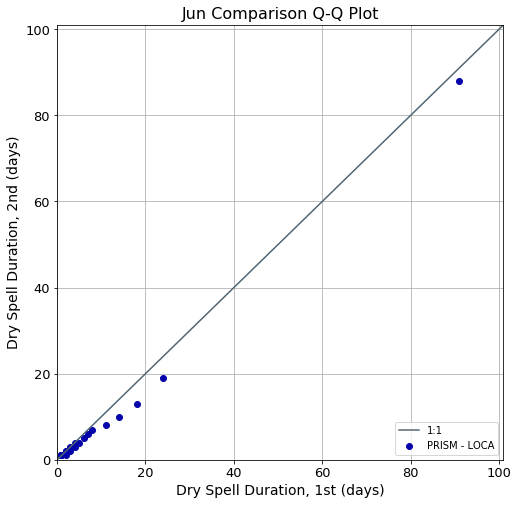

In [136]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JunPRQs, JunLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

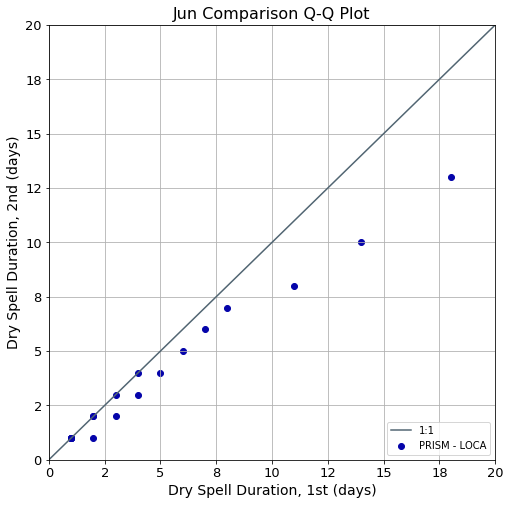

In [137]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JunPRQs, JunLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jun Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

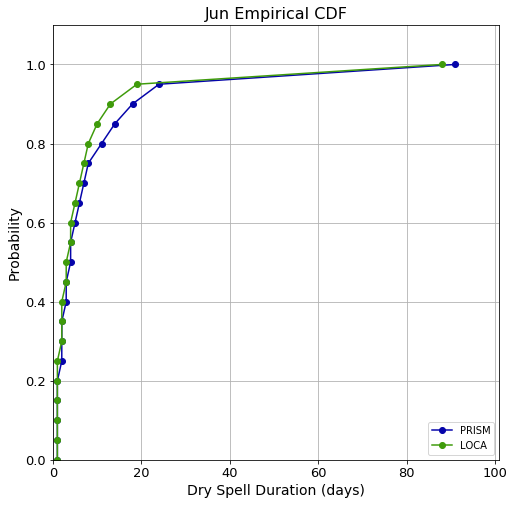

In [138]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( JunPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( JunLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Jun Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Jul

In [139]:
JulNum = 7

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [140]:
JulPrBSCI = sstats.bayes_mvs( np.array( JulPRDF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [141]:
JulPrBSCI

(Mean(statistic=9.004230118443317, minmax=(8.886899815217925, 9.12156042166871)),
 Variance(statistic=90.21413890248826, minmax=(88.63811610649475, 91.79016169848177)),
 Std_dev(statistic=9.498112386284353, minmax=(9.415147333235005, 9.5810774393337)))

In [142]:
JulPrBSCI[0][0], JulPrBSCI[0][1][0], JulPrBSCI[0][1][1]

(9.004230118443317, 8.886899815217925, 9.12156042166871)

In [143]:
SPRMean.append( JulPrBSCI[0][0] )
SPRMeanMinCI.append( JulPrBSCI[0][1][0] )
SPRMeanMaxCI.append( JulPrBSCI[0][1][1] )
SPRVar.append( JulPrBSCI[1][0] )
SPRVarMinCI.append( JulPrBSCI[1][1][0] )
SPRVarMaxCI.append( JulPrBSCI[1][1][1] )
SPRStd.append( JulPrBSCI[2][0] )
SPRStdMinCI.append( JulPrBSCI[2][1][0] )
SPRStdMaxCI.append( JulPrBSCI[2][1][1] )

In [144]:
JulLOBSCI = sstats.bayes_mvs( np.array( JulLODF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [145]:
SLOMean.append( JulLOBSCI[0][0] )
SLOMeanMinCI.append( JulLOBSCI[0][1][0] )
SLOMeanMaxCI.append( JulLOBSCI[0][1][1] )
SLOVar.append( JulLOBSCI[1][0] )
SLOVarMinCI.append( JulLOBSCI[1][1][0] )
SLOVarMaxCI.append( JulLOBSCI[1][1][1] )
SLOStd.append( JulLOBSCI[2][0] )
SLOStdMinCI.append( JulLOBSCI[2][1][0] )
SLOStdMaxCI.append( JulLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [146]:
JulTTPRtoLO = sstats.ttest_ind( np.array( JulPRDF["Dry_Count"], dtype=np.int32 ), 
                                np.array( JulLODF["Dry_Count"], dtype=np.int32 ) )

In [147]:
JulTTPRtoLOPval = JulTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % JulTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [148]:
JulMWUPRtoLO = sstats.mannwhitneyu( np.array( JulPRDF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( JulLODF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [149]:
JulMWUPRtoLOPval = JulMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % JulMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 1.43459e-178


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [150]:
JulKWPRtoLO = sstats.kruskal( np.array( JulPRDF["Dry_Count"], dtype=np.int32 ), 
                              np.array( JulLODF["Dry_Count"], dtype=np.int32 ) )

In [151]:
JulKWPRtoLOPval = JulKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % JulKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 1


In [152]:
JulLODF["Dry_Count"].median(), JulPRDF["Dry_Count"].median()

(4.0, 6.0)

#### Plots

In [153]:
JulPRQs = JulPRDF["Dry_Count"].quantile(q=nCompQs)
JulLOQs = JulLODF["Dry_Count"].quantile(q=nCompQs)

In [154]:
maxQs = max( JulPRQs.max(), JulLOQs.max() )
maxQs = maxQs + 10.0
maxQs

88.0

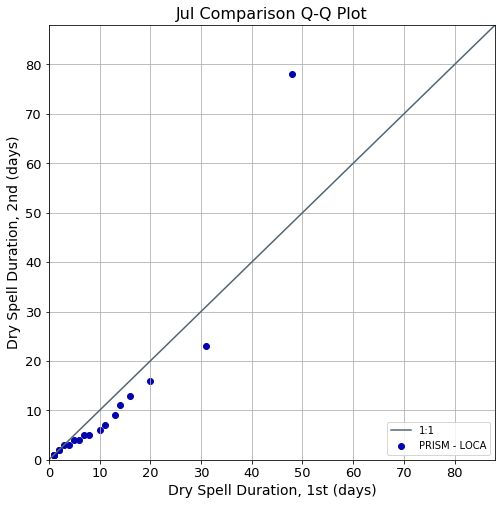

In [155]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JulPRQs, JulLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

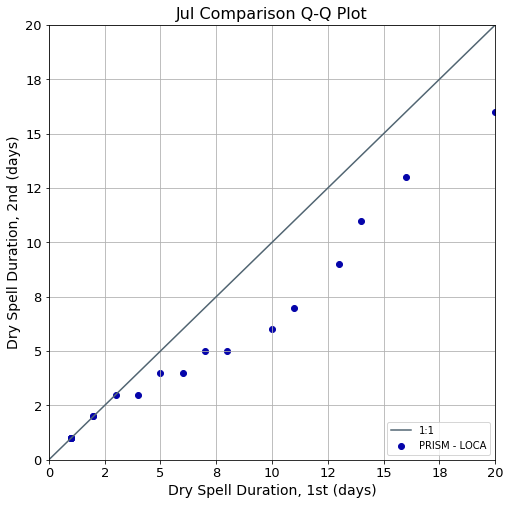

In [156]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( JulPRQs, JulLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Jul Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

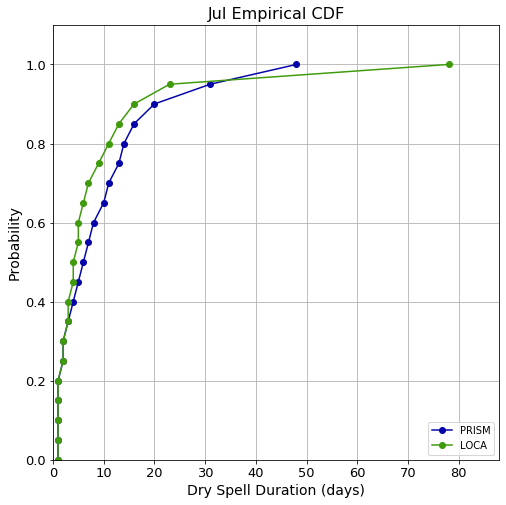

In [157]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( JulPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( JulLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Jul Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Aug

In [158]:
AugNum = 8

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [159]:
AugPrBSCI = sstats.bayes_mvs( np.array( AugPRDF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [160]:
AugPrBSCI

(Mean(statistic=6.787959621319106, minmax=(6.704048847742075, 6.8718703948961375)),
 Variance(statistic=49.7560744968266, minmax=(48.91901606126163, 50.59313293239157)),
 Std_dev(statistic=7.053798586352364, minmax=(6.994464709341436, 7.113132463363291)))

In [161]:
AugPrBSCI[0][0], AugPrBSCI[0][1][0], AugPrBSCI[0][1][1]

(6.787959621319106, 6.704048847742075, 6.8718703948961375)

In [162]:
SPRMean.append( AugPrBSCI[0][0] )
SPRMeanMinCI.append( AugPrBSCI[0][1][0] )
SPRMeanMaxCI.append( AugPrBSCI[0][1][1] )
SPRVar.append( AugPrBSCI[1][0] )
SPRVarMinCI.append( AugPrBSCI[1][1][0] )
SPRVarMaxCI.append( AugPrBSCI[1][1][1] )
SPRStd.append( AugPrBSCI[2][0] )
SPRStdMinCI.append( AugPrBSCI[2][1][0] )
SPRStdMaxCI.append( AugPrBSCI[2][1][1] )

In [163]:
AugLOBSCI = sstats.bayes_mvs( np.array( AugLODF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [164]:
SLOMean.append( AugLOBSCI[0][0] )
SLOMeanMinCI.append( AugLOBSCI[0][1][0] )
SLOMeanMaxCI.append( AugLOBSCI[0][1][1] )
SLOVar.append( AugLOBSCI[1][0] )
SLOVarMinCI.append( AugLOBSCI[1][1][0] )
SLOVarMaxCI.append( AugLOBSCI[1][1][1] )
SLOStd.append( AugLOBSCI[2][0] )
SLOStdMinCI.append( AugLOBSCI[2][1][0] )
SLOStdMaxCI.append( AugLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [165]:
AugTTPRtoLO = sstats.ttest_ind( np.array( AugPRDF["Dry_Count"], dtype=np.int32 ), 
                                np.array( AugLODF["Dry_Count"], dtype=np.int32 ) )

In [166]:
AugTTPRtoLOPval = AugTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % AugTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 1.95251e-48


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [167]:
AugMWUPRtoLO = sstats.mannwhitneyu( np.array( AugPRDF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( AugLODF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [168]:
AugMWUPRtoLOPval = AugMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % AugMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 3.54924e-52


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [169]:
AugKWPRtoLO = sstats.kruskal( np.array( AugPRDF["Dry_Count"], dtype=np.int32 ), 
                              np.array( AugLODF["Dry_Count"], dtype=np.int32 ) )

In [170]:
AugKWPRtoLOPval = AugKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % AugKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [171]:
AugLODF["Dry_Count"].median(), AugPRDF["Dry_Count"].median()

(4.0, 5.0)

#### Plots

In [172]:
AugPRQs = AugPRDF["Dry_Count"].quantile(q=nCompQs)
AugLOQs = AugLODF["Dry_Count"].quantile(q=nCompQs)

In [173]:
maxQs = max( AugPRQs.max(), AugLOQs.max() )
maxQs = maxQs + 10.0
maxQs

132.0

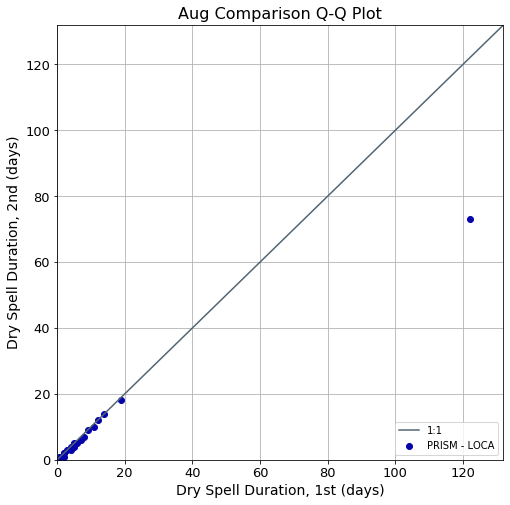

In [174]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AugPRQs, AugLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

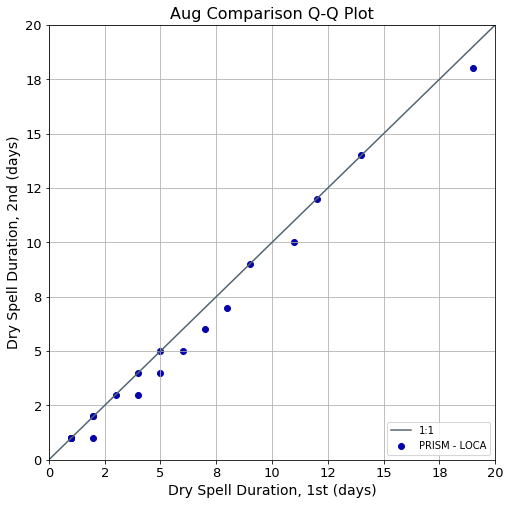

In [175]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( AugPRQs, AugLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Aug Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

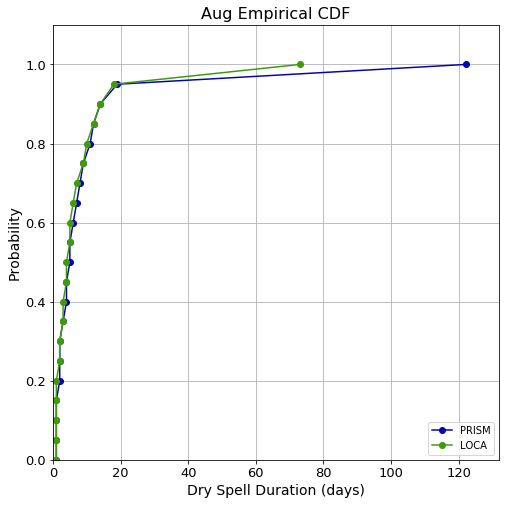

In [176]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( AugPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( AugLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Aug Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Sep

In [177]:
SepNum = 9

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [178]:
SepPrBSCI = sstats.bayes_mvs( np.array( SepPRDF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [179]:
SepPrBSCI

(Mean(statistic=7.639351543415501, minmax=(7.549163225431481, 7.7295398613995205)),
 Variance(statistic=67.6889866547872, minmax=(66.63962717202213, 68.73834613755227)),
 Std_dev(statistic=8.227331684986767, minmax=(8.163558913756459, 8.291104456217075)))

In [180]:
SepPrBSCI[0][0], SepPrBSCI[0][1][0], SepPrBSCI[0][1][1]

(7.639351543415501, 7.549163225431481, 7.7295398613995205)

In [181]:
SPRMean.append( SepPrBSCI[0][0] )
SPRMeanMinCI.append( SepPrBSCI[0][1][0] )
SPRMeanMaxCI.append( SepPrBSCI[0][1][1] )
SPRVar.append( SepPrBSCI[1][0] )
SPRVarMinCI.append( SepPrBSCI[1][1][0] )
SPRVarMaxCI.append( SepPrBSCI[1][1][1] )
SPRStd.append( SepPrBSCI[2][0] )
SPRStdMinCI.append( SepPrBSCI[2][1][0] )
SPRStdMaxCI.append( SepPrBSCI[2][1][1] )

In [182]:
SepLOBSCI = sstats.bayes_mvs( np.array( SepLODF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [183]:
SLOMean.append( SepLOBSCI[0][0] )
SLOMeanMinCI.append( SepLOBSCI[0][1][0] )
SLOMeanMaxCI.append( SepLOBSCI[0][1][1] )
SLOVar.append( SepLOBSCI[1][0] )
SLOVarMinCI.append( SepLOBSCI[1][1][0] )
SLOVarMaxCI.append( SepLOBSCI[1][1][1] )
SLOStd.append( SepLOBSCI[2][0] )
SLOStdMinCI.append( SepLOBSCI[2][1][0] )
SLOStdMaxCI.append( SepLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [184]:
SepTTPRtoLO = sstats.ttest_ind( np.array( SepPRDF["Dry_Count"], dtype=np.int32 ), 
                                np.array( SepLODF["Dry_Count"], dtype=np.int32 ) )

In [185]:
SepTTPRtoLOPval = SepTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % SepTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [186]:
SepMWUPRtoLO = sstats.mannwhitneyu( np.array( SepPRDF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( SepLODF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [187]:
SepMWUPRtoLOPval = SepMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % SepMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 0


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [188]:
SepKWPRtoLO = sstats.kruskal( np.array( SepPRDF["Dry_Count"], dtype=np.int32 ), 
                              np.array( SepLODF["Dry_Count"], dtype=np.int32 ) )

In [189]:
SepKWPRtoLOPval = SepKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % SepKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 1


In [190]:
SepLODF["Dry_Count"].median(), SepPRDF["Dry_Count"].median()

(3.0, 4.0)

#### Plots

In [191]:
SepPRQs = SepPRDF["Dry_Count"].quantile(q=nCompQs)
SepLOQs = SepLODF["Dry_Count"].quantile(q=nCompQs)

In [192]:
maxQs = max( SepPRQs.max(), SepLOQs.max() )
maxQs = maxQs + 10.0
maxQs

110.0

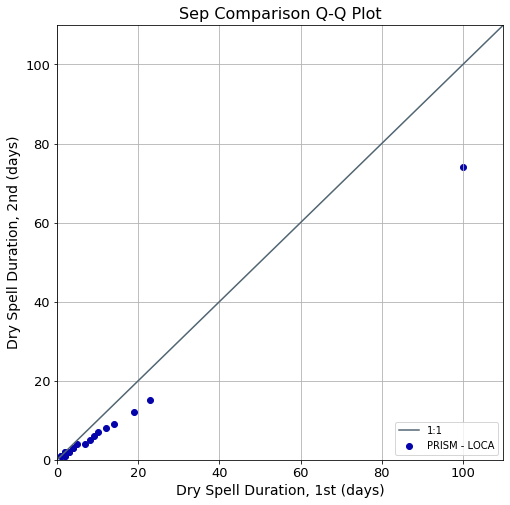

In [193]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( SepPRQs, SepLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

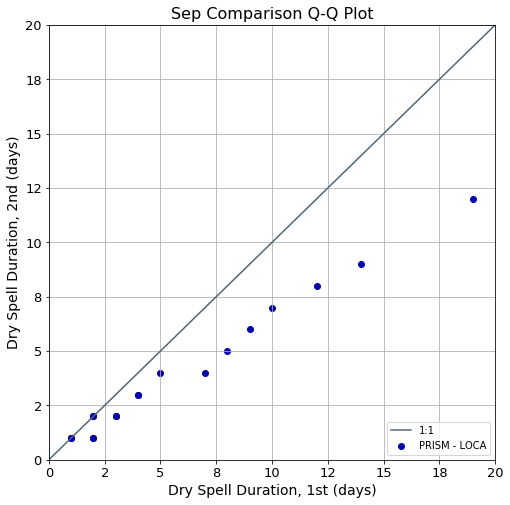

In [194]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( SepPRQs, SepLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Sep Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

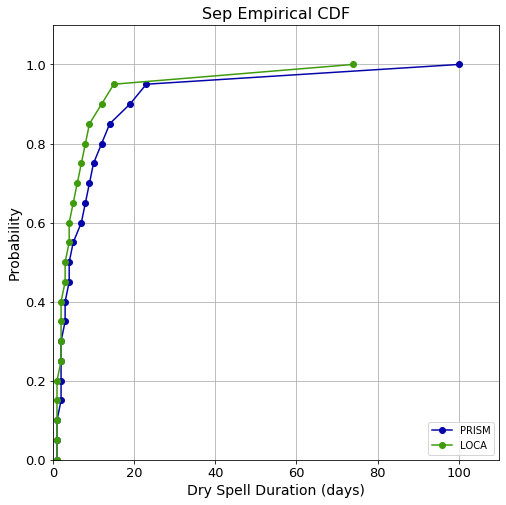

In [195]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( SepPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( SepLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Sep Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Oct

In [196]:
OctNum = 10

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [197]:
OctPrBSCI = sstats.bayes_mvs( np.array( OctPRDF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [198]:
OctPrBSCI

(Mean(statistic=9.82545242265032, minmax=(9.669980560105362, 9.980924285195279)),
 Variance(statistic=168.34457957958378, minmax=(165.49181214686863, 171.19734701229893)),
 Std_dev(statistic=12.974767033730656, minmax=(12.864831825441414, 13.084702242019898)))

In [199]:
OctPrBSCI[0][0], OctPrBSCI[0][1][0], OctPrBSCI[0][1][1]

(9.82545242265032, 9.669980560105362, 9.980924285195279)

In [200]:
SPRMean.append( OctPrBSCI[0][0] )
SPRMeanMinCI.append( OctPrBSCI[0][1][0] )
SPRMeanMaxCI.append( OctPrBSCI[0][1][1] )
SPRVar.append( OctPrBSCI[1][0] )
SPRVarMinCI.append( OctPrBSCI[1][1][0] )
SPRVarMaxCI.append( OctPrBSCI[1][1][1] )
SPRStd.append( OctPrBSCI[2][0] )
SPRStdMinCI.append( OctPrBSCI[2][1][0] )
SPRStdMaxCI.append( OctPrBSCI[2][1][1] )

In [201]:
OctLOBSCI = sstats.bayes_mvs( np.array( OctLODF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [202]:
SLOMean.append( OctLOBSCI[0][0] )
SLOMeanMinCI.append( OctLOBSCI[0][1][0] )
SLOMeanMaxCI.append( OctLOBSCI[0][1][1] )
SLOVar.append( OctLOBSCI[1][0] )
SLOVarMinCI.append( OctLOBSCI[1][1][0] )
SLOVarMaxCI.append( OctLOBSCI[1][1][1] )
SLOStd.append( OctLOBSCI[2][0] )
SLOStdMinCI.append( OctLOBSCI[2][1][0] )
SLOStdMaxCI.append( OctLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [203]:
OctTTPRtoLO = sstats.ttest_ind( np.array( OctPRDF["Dry_Count"], dtype=np.int32 ), 
                                np.array( OctLODF["Dry_Count"], dtype=np.int32 ) )

In [204]:
OctTTPRtoLOPval = OctTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % OctTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [205]:
OctMWUPRtoLO = sstats.mannwhitneyu( np.array( OctPRDF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( OctLODF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [206]:
OctMWUPRtoLOPval = OctMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % OctMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 6.87678e-236


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [207]:
OctKWPRtoLO = sstats.kruskal( np.array( OctPRDF["Dry_Count"], dtype=np.int32 ), 
                              np.array( OctLODF["Dry_Count"], dtype=np.int32 ) )

In [208]:
OctKWPRtoLOPval = OctKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % OctKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [209]:
OctLODF["Dry_Count"].median(), OctPRDF["Dry_Count"].median()

(4.0, 5.0)

#### Plots

In [210]:
OctPRQs = OctPRDF["Dry_Count"].quantile(q=nCompQs)
OctLOQs = OctLODF["Dry_Count"].quantile(q=nCompQs)

In [211]:
maxQs = max( OctPRQs.max(), OctLOQs.max() )
maxQs = maxQs + 10.0
maxQs

105.0

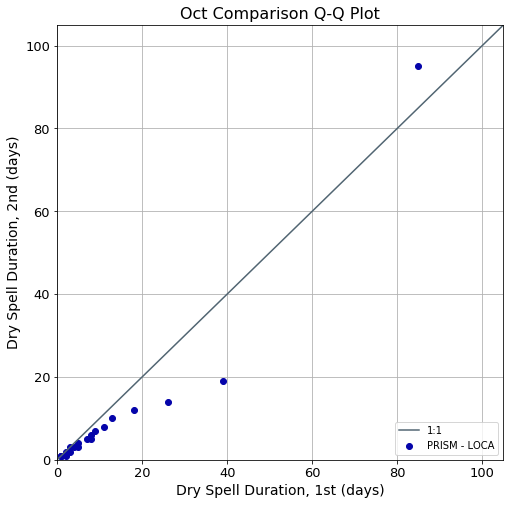

In [212]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( OctPRQs, OctLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

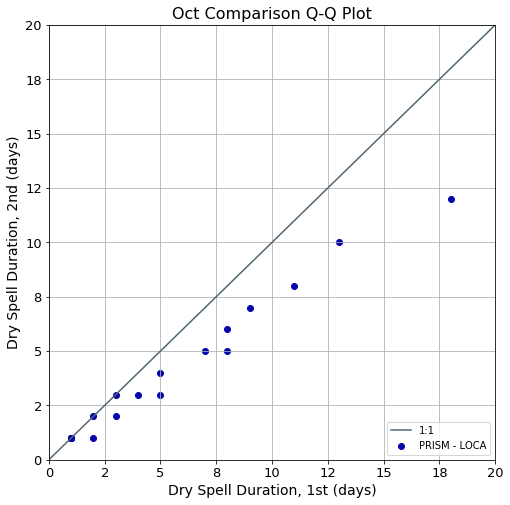

In [213]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( OctPRQs, OctLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Oct Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

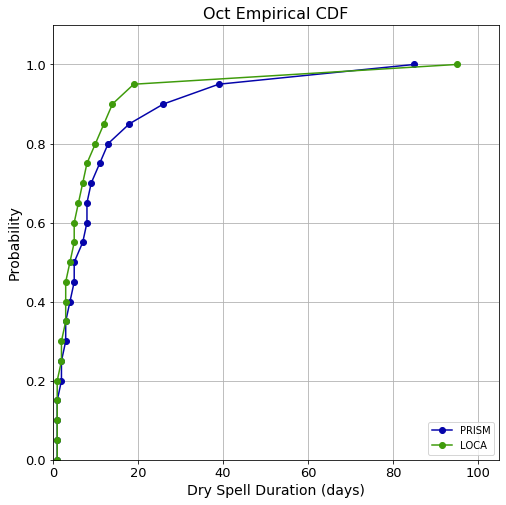

In [214]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( OctPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( OctLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Oct Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Nov

In [215]:
NovNum = 11

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [216]:
NovPrBSCI = sstats.bayes_mvs( np.array( NovPRDF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [217]:
NovPrBSCI

(Mean(statistic=11.08902735997708, minmax=(10.930103062369762, 11.2479516575844)),
 Variance(statistic=130.3388009591426, minmax=(127.77288658761368, 132.90471533067148)),
 Std_dev(statistic=11.416601988295055, minmax=(11.30422553976161, 11.528978436828499)))

In [218]:
NovPrBSCI[0][0], NovPrBSCI[0][1][0], NovPrBSCI[0][1][1]

(11.08902735997708, 10.930103062369762, 11.2479516575844)

In [219]:
SPRMean.append( NovPrBSCI[0][0] )
SPRMeanMinCI.append( NovPrBSCI[0][1][0] )
SPRMeanMaxCI.append( NovPrBSCI[0][1][1] )
SPRVar.append( NovPrBSCI[1][0] )
SPRVarMinCI.append( NovPrBSCI[1][1][0] )
SPRVarMaxCI.append( NovPrBSCI[1][1][1] )
SPRStd.append( NovPrBSCI[2][0] )
SPRStdMinCI.append( NovPrBSCI[2][1][0] )
SPRStdMaxCI.append( NovPrBSCI[2][1][1] )

In [220]:
NovLOBSCI = sstats.bayes_mvs( np.array( NovLODF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [221]:
SLOMean.append( NovLOBSCI[0][0] )
SLOMeanMinCI.append( NovLOBSCI[0][1][0] )
SLOMeanMaxCI.append( NovLOBSCI[0][1][1] )
SLOVar.append( NovLOBSCI[1][0] )
SLOVarMinCI.append( NovLOBSCI[1][1][0] )
SLOVarMaxCI.append( NovLOBSCI[1][1][1] )
SLOStd.append( NovLOBSCI[2][0] )
SLOStdMinCI.append( NovLOBSCI[2][1][0] )
SLOStdMaxCI.append( NovLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [222]:
NovTTPRtoLO = sstats.ttest_ind( np.array( NovPRDF["Dry_Count"], dtype=np.int32 ), 
                                np.array( NovLODF["Dry_Count"], dtype=np.int32 ) )

In [223]:
NovTTPRtoLOPval = NovTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % NovTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [224]:
NovMWUPRtoLO = sstats.mannwhitneyu( np.array( NovPRDF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( NovLODF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [225]:
NovMWUPRtoLOPval = NovMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % NovMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 0


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [226]:
NovKWPRtoLO = sstats.kruskal( np.array( NovPRDF["Dry_Count"], dtype=np.int32 ), 
                              np.array( NovLODF["Dry_Count"], dtype=np.int32 ) )

In [227]:
NovKWPRtoLOPval = NovKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % NovKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 0


In [228]:
NovLODF["Dry_Count"].median(), NovPRDF["Dry_Count"].median()

(4.0, 8.0)

#### Plots

In [229]:
NovPRQs = NovPRDF["Dry_Count"].quantile(q=nCompQs)
NovLOQs = NovLODF["Dry_Count"].quantile(q=nCompQs)

In [230]:
maxQs = max( NovPRQs.max(), NovLOQs.max() )
maxQs = maxQs + 10.0
maxQs

118.0

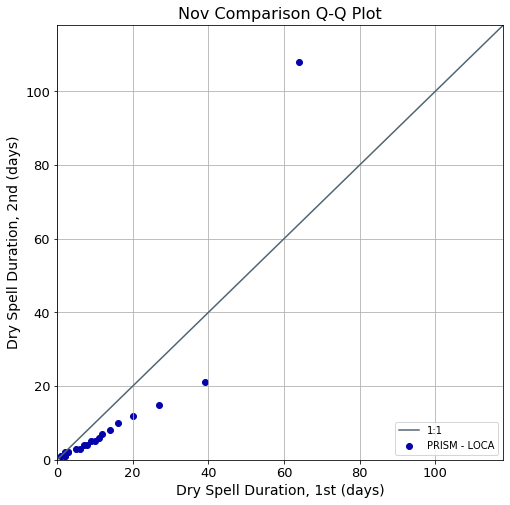

In [231]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( NovPRQs, NovLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

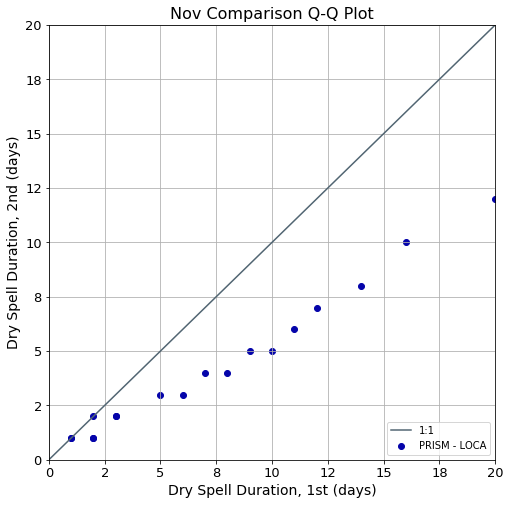

In [232]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( NovPRQs, NovLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Nov Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

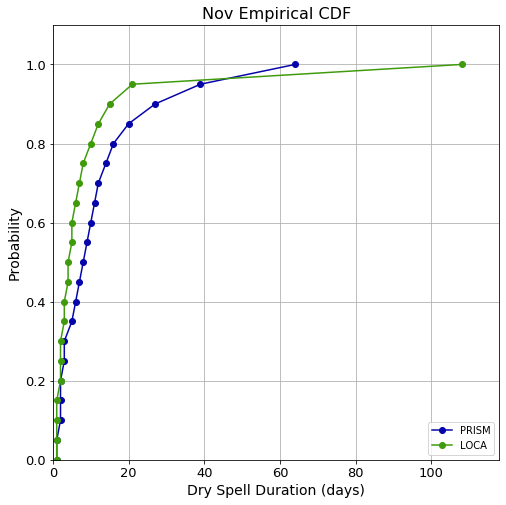

In [233]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( NovPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( NovLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Nov Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

### Dec

In [234]:
DecNum = 12

Bayesian estimates of confidence intervals for mean, variance, and standard deviation of the samples

In [235]:
DecPrBSCI = sstats.bayes_mvs( np.array( DecPRDF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [236]:
DecPrBSCI

(Mean(statistic=11.275549048316252, minmax=(11.094624843250033, 11.456473253382471)),
 Variance(statistic=165.26828941304086, minmax=(161.97896705539668, 168.55761177068504)),
 Std_dev(statistic=12.85567148822032, minmax=(12.727738755937212, 12.983604220503429)))

In [237]:
DecPrBSCI[0][0], DecPrBSCI[0][1][0], DecPrBSCI[0][1][1]

(11.275549048316252, 11.094624843250033, 11.456473253382471)

In [238]:
SPRMean.append( DecPrBSCI[0][0] )
SPRMeanMinCI.append( DecPrBSCI[0][1][0] )
SPRMeanMaxCI.append( DecPrBSCI[0][1][1] )
SPRVar.append( DecPrBSCI[1][0] )
SPRVarMinCI.append( DecPrBSCI[1][1][0] )
SPRVarMaxCI.append( DecPrBSCI[1][1][1] )
SPRStd.append( DecPrBSCI[2][0] )
SPRStdMinCI.append( DecPrBSCI[2][1][0] )
SPRStdMaxCI.append( DecPrBSCI[2][1][1] )

In [239]:
DecLOBSCI = sstats.bayes_mvs( np.array( DecLODF["Dry_Count"], dtype=np.int32 ), alpha=0.9 )

In [240]:
SLOMean.append( DecLOBSCI[0][0] )
SLOMeanMinCI.append( DecLOBSCI[0][1][0] )
SLOMeanMaxCI.append( DecLOBSCI[0][1][1] )
SLOVar.append( DecLOBSCI[1][0] )
SLOVarMinCI.append( DecLOBSCI[1][1][0] )
SLOVarMaxCI.append( DecLOBSCI[1][1][1] )
SLOStd.append( DecLOBSCI[2][0] )
SLOStdMinCI.append( DecLOBSCI[2][1][0] )
SLOStdMaxCI.append( DecLOBSCI[2][1][1] )

#### T-Test

T-Test for the means of two independent samples. Two-sided test for the null hypothesis that 2 independent samples hae identical average values. Test assumes that the populations have identical variances.

If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [241]:
DecTTPRtoLO = sstats.ttest_ind( np.array( DecPRDF["Dry_Count"], dtype=np.int32 ), 
                                np.array( DecLODF["Dry_Count"], dtype=np.int32 ) )

In [242]:
DecTTPRtoLOPval = DecTTPRtoLO[1]
print("P-Value for PRISM and LOCA from same population is: %g" % DecTTPRtoLOPval )

P-Value for PRISM and LOCA from same population is: 0


#### Mann-Whitney Rank Test

Nonparametric test of the null hypothesis that it is equally likely that a randomly selected value from one sample will be less than or greater than a randomly selected value from a second sample. This test can be used to investigate whether two independent samples were selected from populations having the same distribution.

Null hypothesis, $H_{0}$, is that the distributions of both populations are equal.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of being from the same distribution.

In [243]:
DecMWUPRtoLO = sstats.mannwhitneyu( np.array( DecPRDF["Dry_Count"], dtype=np.int32 ), 
                                    np.array( DecLODF["Dry_Count"], dtype=np.int32 ), 
                                    alternative='two-sided' )

In [244]:
DecMWUPRtoLOPval = DecMWUPRtoLO[1]
print("P-Value for PRISM and LOCA from same distribution is: %g" % DecMWUPRtoLOPval )

P-Value for PRISM and LOCA from same distribution is: 2.8807e-214


#### Kruskal-Wallis Test

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs.

If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of the same population median.

In [245]:
DecKWPRtoLO = sstats.kruskal( np.array( DecPRDF["Dry_Count"], dtype=np.int32 ), 
                              np.array( DecLODF["Dry_Count"], dtype=np.int32 ) )

In [246]:
DecKWPRtoLOPval = DecKWPRtoLO[1]
print("P-Value for PRISM and LOCA have the same median is: %g" % DecKWPRtoLOPval )

P-Value for PRISM and LOCA have the same median is: 1


In [247]:
DecLODF["Dry_Count"].median(), DecPRDF["Dry_Count"].median()

(5.0, 6.0)

#### Plots

In [248]:
DecPRQs = DecPRDF["Dry_Count"].quantile(q=nCompQs)
DecLOQs = DecLODF["Dry_Count"].quantile(q=nCompQs)

In [249]:
maxQs = max( DecPRQs.max(), DecLOQs.max() )
maxQs = maxQs + 10.0
maxQs

108.0

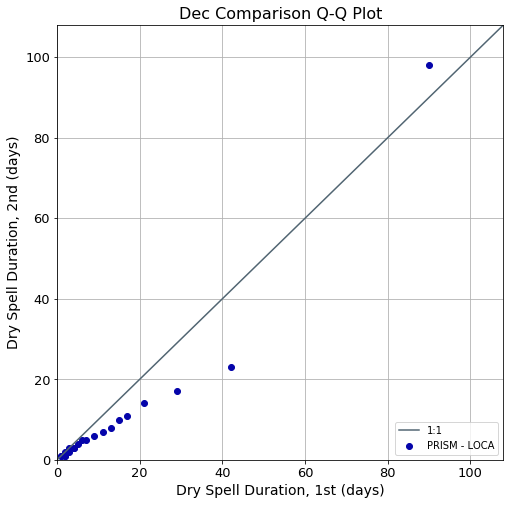

In [250]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DecPRQs, DecLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, maxQs) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

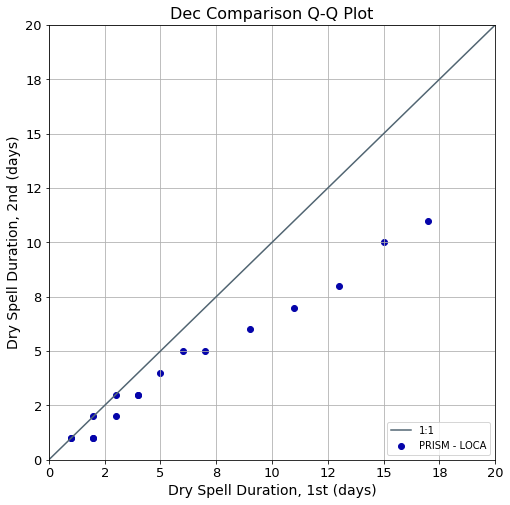

In [251]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DecPRQs, DecLOQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM - LOCA")
ax11.plot( [0.0, maxQs], [0.0, maxQs], marker=None, linestyle='-', color='xkcd:slate', label="1:1")
ax11.set_title('Dec Comparison Q-Q Plot', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration, 1st (days)', fontsize=14 )
ax11.set_ylabel('Dry Spell Duration, 2nd (days)', fontsize=14)
ax11.set_xlim( (0.0, 20.0) )
ax11.set_ylim( (0.0, 20.0) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

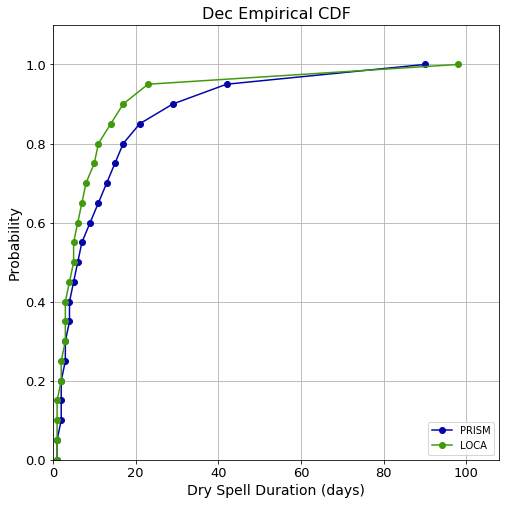

In [252]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 8.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( DecPRQs, nCompQs, c='xkcd:royal blue', marker='o', linestyle='-', label="PRISM")
ax11.plot( DecLOQs, nCompQs, c='xkcd:grass green', marker='o', linestyle='-', label="LOCA")
ax11.set_title('Dec Empirical CDF', fontsize=16 )
ax11.set_xlabel('Dry Spell Duration (days)', fontsize=14 )
ax11.set_ylabel('Probability', fontsize=14)
ax11.set_xlim( (0.0, maxQs) )
ax11.set_ylim( (0.0, 1.1) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

## Final Collations, Plots, and Outputs

In [253]:
DataDict = { "Min CI Mean" : np.array( SPRMeanMinCI, dtype=np.float32 ), #0
             "Mean" : np.array( SPRMean, dtype=np.float32 ), #1
             "Max CI Mean" : np.array( SPRMeanMaxCI, dtype=np.float32 ), #2
             "Min CI Var" : np.array( SPRVarMinCI, dtype=np.float32 ), #3
             "Var" : np.array( SPRVar, dtype=np.float32 ), #4
             "Max CI Var" : np.array( SPRVarMaxCI, dtype=np.float32 ), #5
             "Min CI Std" : np.array( SPRStdMinCI, dtype=np.float32 ), #6
             "Std" : np.array( SPRStd, dtype=np.float32 ), #7
             "Max CI Std" : np.array( SPRStdMaxCI, dtype=np.float32 ), #8
}
PRBayStatsCIDF = pd.DataFrame( index=[x for x in range(1, 13, 1)], data=DataDict )

In [254]:
BSCIHds = list( PRBayStatsCIDF.columns )

In [255]:
display( HTML( PRBayStatsCIDF.to_html() ) )

,Min CI Mean,Mean,Max CI Mean,Min CI Var,Var,Max CI Var,Min CI Std,Std,Max CI Std
1,8.558955,8.667023,8.775090,71.409012,72.712219,74.015427,8.450730,8.527146,8.603561
2,8.139255,8.246318,8.353382,69.777870,71.054169,72.330467,8.353658,8.429363,8.505069
3,8.099324,8.187302,8.275278,61.107346,62.087711,63.068077,7.817366,7.879576,7.941785
4,7.623258,7.712354,7.801450,49.878075,50.775921,51.673767,7.062722,7.125722,7.188723
5,6.074561,6.137622,6.200684,36.560043,37.103271,37.646503,6.046655,6.091246,6.135837
6,6.884109,6.979430,7.074751,75.066910,76.243996,77.421074,8.664378,8.731781,8.799183
7,8.886900,9.004230,9.121560,88.638115,90.214142,91.790161,9.415148,9.498113,9.581078
8,6.704049,6.787960,6.871871,48.919018,49.756073,50.593132,6.994465,7.053799,7.113132
9,7.549163,7.639351,7.729540,66.639626,67.688988,68.738350,8.163559,8.227332,8.291104
10,9.669981,9.825453,9.980925,165.491806,168.344574,171.197342,12.864832,12.974767,13.084702


In [256]:
DataDict = { "Min CI Mean" : np.array( SLOMeanMinCI, dtype=np.float32 ), #0
             "Mean" : np.array( SLOMean, dtype=np.float32 ), #1
             "Max CI Mean" : np.array( SLOMeanMaxCI, dtype=np.float32 ), #2
             "Min CI Var" : np.array( SLOVarMinCI, dtype=np.float32 ), #3
             "Var" : np.array( SLOVar, dtype=np.float32 ), #4
             "Max CI Var" : np.array( SLOVarMaxCI, dtype=np.float32 ), #5
             "Min CI Std" : np.array( SLOStdMinCI, dtype=np.float32 ), #6
             "Std" : np.array( SLOStd, dtype=np.float32 ), #7
             "Max CI Std" : np.array( SLOStdMaxCI, dtype=np.float32 ), #8
}
LOBayStatsCIDF = pd.DataFrame( index=[x for x in range(1, 13, 1)], data=DataDict )

In [257]:
display( HTML( LOBayStatsCIDF.to_html() ) )

,Min CI Mean,Mean,Max CI Mean,Min CI Var,Var,Max CI Var,Min CI Std,Std,Max CI Std
1,7.588606,7.600758,7.612910,56.193562,56.322536,56.451515,7.496242,7.504834,7.513427
2,6.995934,7.007583,7.019232,51.113220,51.231133,51.349049,7.149355,7.157593,7.165830
3,6.977912,6.988409,6.998906,44.601753,44.701004,44.800259,6.678459,6.685881,6.693304
4,5.130095,5.137130,5.144166,21.992319,22.039028,22.085739,4.689600,4.694574,4.699549
5,4.135793,4.141581,4.147368,18.037533,18.072329,18.107126,4.247064,4.251156,4.255249
6,5.515992,5.525916,5.535839,46.317726,46.413334,46.508945,6.805717,6.812733,6.819750
7,6.801251,6.813155,6.825059,54.699200,54.823845,54.948494,7.395895,7.404313,7.412730
8,6.134584,6.144145,6.153707,36.077797,36.159107,36.240414,6.006484,6.013244,6.020005
9,5.087652,5.095597,5.103542,28.253239,28.313023,28.372808,5.315381,5.320998,5.326616
10,6.222887,6.233228,6.243568,46.945210,47.045517,47.145824,6.851661,6.858974,6.866285


In [259]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DryDayComp_LOCA_1981-2011.xlsx" ) )
with pd.ExcelWriter( OutFiler ) as writer:
    PRBayStatsCIDF.to_excel( writer, sheet_name="PRISM_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )
    LOBayStatsCIDF.to_excel( writer, sheet_name="LOCA_CI_Stats", na_rep=str(np.nan), 
                             columns=BSCIHds, index=True, index_label="Month" )

Plot the monthly confidence intervals with statistic

In [260]:
PRMeanCI = np.append( np.stack( [np.array(PRBayStatsCIDF.index, dtype=np.float32 ),
                          np.array(PRBayStatsCIDF[BSCIHds[0]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(PRBayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(PRBayStatsCIDF[BSCIHds[2]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
PRMeanCI = np.vstack( [PRMeanCI[:,:], PRMeanCI[0,:]] )

In [261]:
LOMeanCI = np.append( np.stack( [np.array(LOBayStatsCIDF.index, dtype=np.float32 ),
                          np.array(LOBayStatsCIDF[BSCIHds[0]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(LOBayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(LOBayStatsCIDF[BSCIHds[2]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
LOMeanCI = np.vstack( [LOMeanCI[:,:], LOMeanCI[0,:]] )

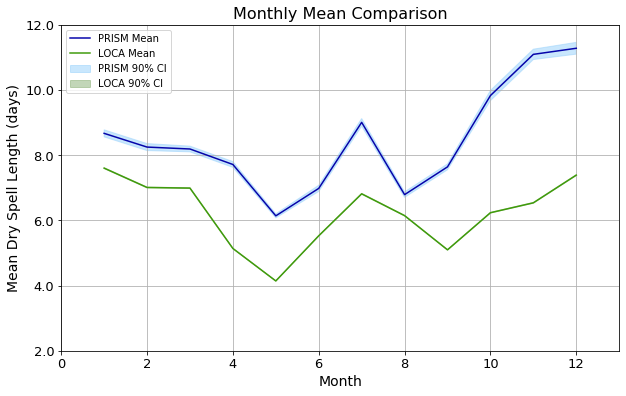

In [262]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRBayStatsCIDF.index, PRBayStatsCIDF[BSCIHds[1]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Mean" )
ax11.fill( PRMeanCI[:,0], PRMeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LOBayStatsCIDF.index, LOBayStatsCIDF[BSCIHds[1]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Mean" )
ax11.fill( LOMeanCI[:,0], LOMeanCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_title('Monthly Mean Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Dry Spell Length (days)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (2.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

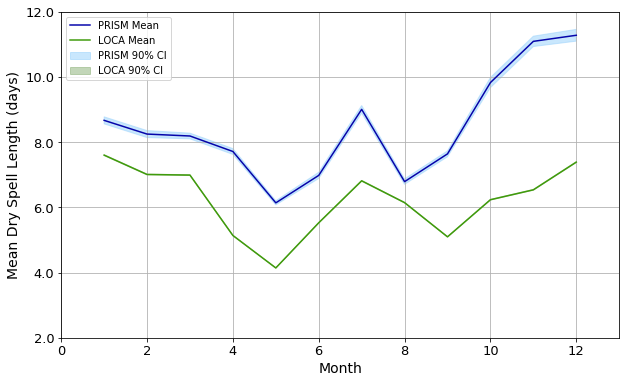

In [263]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRBayStatsCIDF.index, PRBayStatsCIDF[BSCIHds[1]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Mean" )
ax11.fill( PRMeanCI[:,0], PRMeanCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LOBayStatsCIDF.index, LOBayStatsCIDF[BSCIHds[1]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Mean" )
ax11.fill( LOMeanCI[:,0], LOMeanCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Mean Dry Spell Length (days)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
ax11.set_ylim( (2.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

In [264]:
PRVarCI = np.append( np.stack( [np.array(PRBayStatsCIDF.index, dtype=np.float32 ),
                          np.array(PRBayStatsCIDF[BSCIHds[3]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(PRBayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(PRBayStatsCIDF[BSCIHds[5]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
PRVarCI = np.vstack( [PRVarCI[:,:], PRVarCI[0,:]] )

In [265]:
LOVarCI = np.append( np.stack( [np.array(LOBayStatsCIDF.index, dtype=np.float32 ),
                          np.array(LOBayStatsCIDF[BSCIHds[3]], dtype=np.float32 )],
                          axis=1 ),
                      np.stack( [np.flip(np.array(LOBayStatsCIDF.index, dtype=np.float32 ), 0),
                          np.flip(np.array(LOBayStatsCIDF[BSCIHds[5]], dtype=np.float32 ), 0)],
                          axis=1 ), axis=0 )
LOVarCI = np.vstack( [LOVarCI[:,:], LOVarCI[0,:]] )

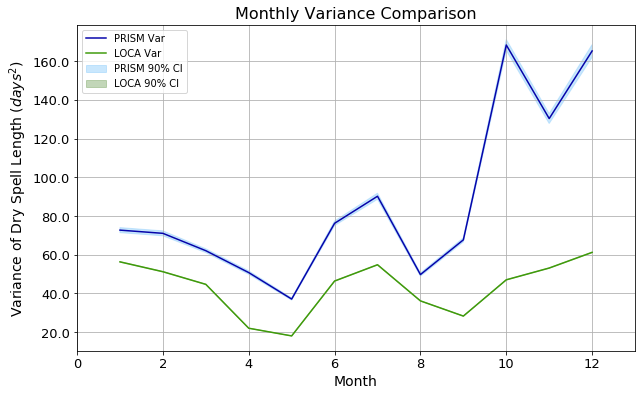

In [266]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRBayStatsCIDF.index, PRBayStatsCIDF[BSCIHds[4]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Var" )
ax11.fill( PRVarCI[:,0], PRVarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LOBayStatsCIDF.index, LOBayStatsCIDF[BSCIHds[4]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Var" )
ax11.fill( LOVarCI[:,0], LOVarCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_title('Monthly Variance Comparison', fontsize=16 )
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Dry Spell Length ($days^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
#ax11.set_ylim( (2.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )

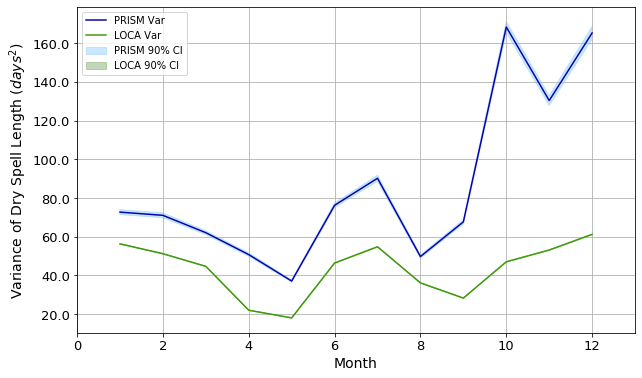

In [267]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( PRBayStatsCIDF.index, PRBayStatsCIDF[BSCIHds[4]], color="xkcd:royal blue", 
           linestyle="-", label="PRISM Var" )
ax11.fill( PRVarCI[:,0], PRVarCI[:,1], color="xkcd:light blue", alpha=0.5, 
           label="PRISM 90% CI")
ax11.plot( LOBayStatsCIDF.index, LOBayStatsCIDF[BSCIHds[4]], color="xkcd:grass green", 
           linestyle="-", label="LOCA Var" )
ax11.fill( LOVarCI[:,0], LOVarCI[:,1], color="xkcd:sage", alpha=0.5, 
           label="LOCA 90% CI")
ax11.set_xlabel('Month', fontsize=14 )
ax11.set_ylabel('Variance of Dry Spell Length ($days^{2}$)', fontsize=14)
ax11.set_xlim( (0.0, 13.0) )
#ax11.set_ylim( (2.0, 12.0) )
ax11.grid( b=True )
ax11.legend(loc='upper left')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )